In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor





In [ ]:
data=pd.read_csv("/content/mission 2.csv")
data.head()

,Location,Size (sqft),Bedrooms,Bathrooms,Year Built,Condition,Price
0,Suburban,1295,5,1,2007,5,61023
1,Urban,1163,1,3,1961,1,216619
2,Urban,2020,1,2,1983,5,168012
3,Suburban,1279,2,1,2004,1,206542
4,Urban,2268,1,1,1961,2,316979


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Location     1000 non-null   object
 1   Size (sqft)  1000 non-null   int64 
 2   Bedrooms     1000 non-null   int64 
 3   Bathrooms    1000 non-null   int64 
 4   Year Built   1000 non-null   int64 
 5   Condition    1000 non-null   int64 
 6   Price        1000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 54.8+ KB


In [ ]:
data.isna().sum()

,0
Location,0
Size (sqft),0
Bedrooms,0
Bathrooms,0
Year Built,0
Condition,0
Price,0


In [ ]:
le=LabelEncoder()
data['Location']=le.fit_transform(data['Location'])

In [ ]:
sc=StandardScaler()
cols=['Size (sqft)', 'Bedrooms', 'Bathrooms', 'Year Built','Condition']
data[cols]=sc.fit_transform(data[cols])

In [ ]:
data

,Location,Size (sqft),Bedrooms,Bathrooms,Year Built,Condition,Price
0,1,-1.067816,1.729282,-1.231835,1.040608,1.255999,61023
1,2,-1.240099,-1.235625,1.256721,-1.133331,-1.397988,216619
2,2,-0.121569,-1.235625,0.012443,-0.093621,1.255999,168012
3,1,-1.088699,-0.494398,-1.231835,0.898830,-1.397988,206542
4,2,0.202113,-1.235625,-1.231835,-1.133331,-0.734491,316979
...,...,...,...,...,...,...,...
995,2,1.513808,0.988055,0.012443,-0.802515,-1.397988,340160
996,0,1.392428,0.246828,1.256721,1.182387,-0.734491,345451
997,0,1.603865,0.246828,-1.231835,0.568013,0.592503,284286
998,1,-0.400875,0.988055,0.012443,-0.140881,-1.397988,212993


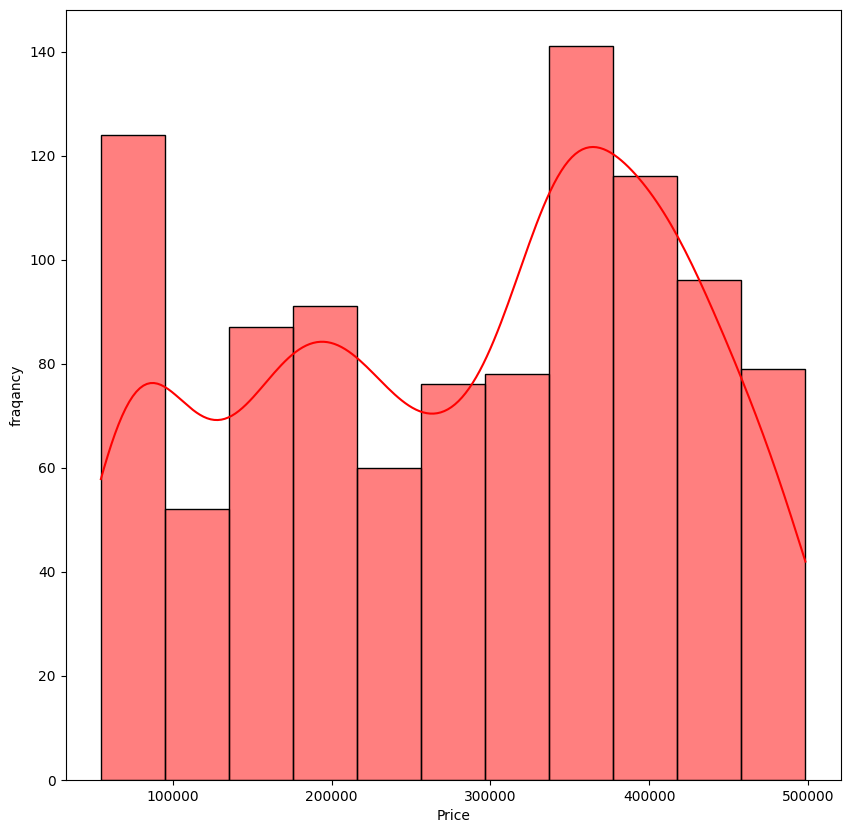

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data['Price'],color='red',kde=True)
plt.tilte=("Distibation")
plt.xlabel("Price")
plt.ylabel("fraqancy")
plt.show()

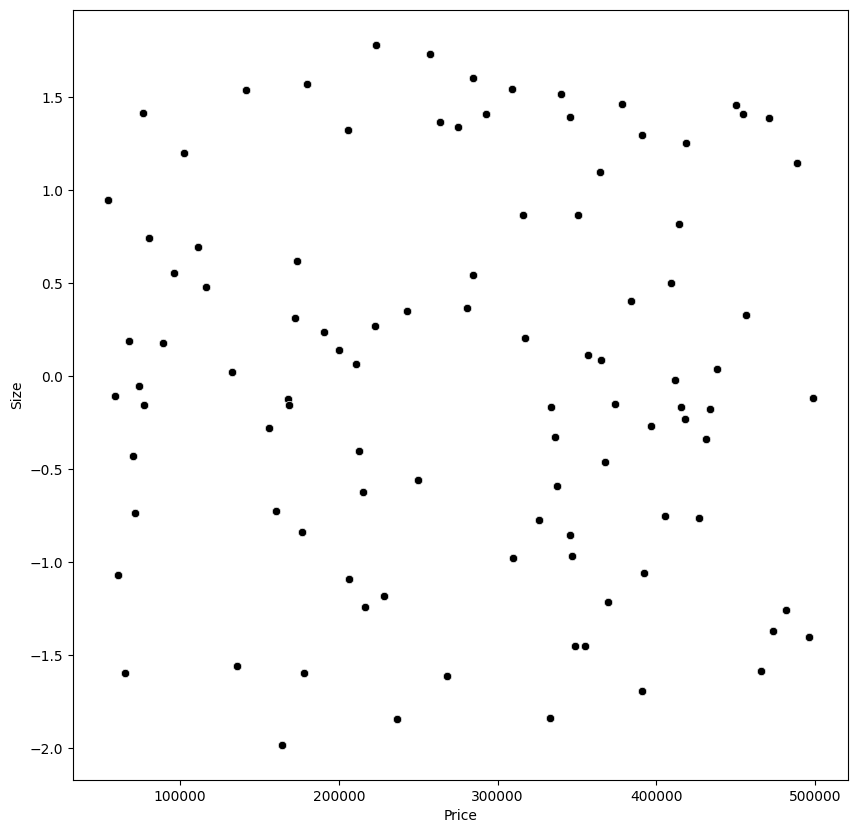

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['Price'],y=data['Size (sqft)'],color='black')
plt.tilte=("realtion betwwen size and price ")
plt.xlabel("Price")
plt.ylabel("Size")
plt.show()

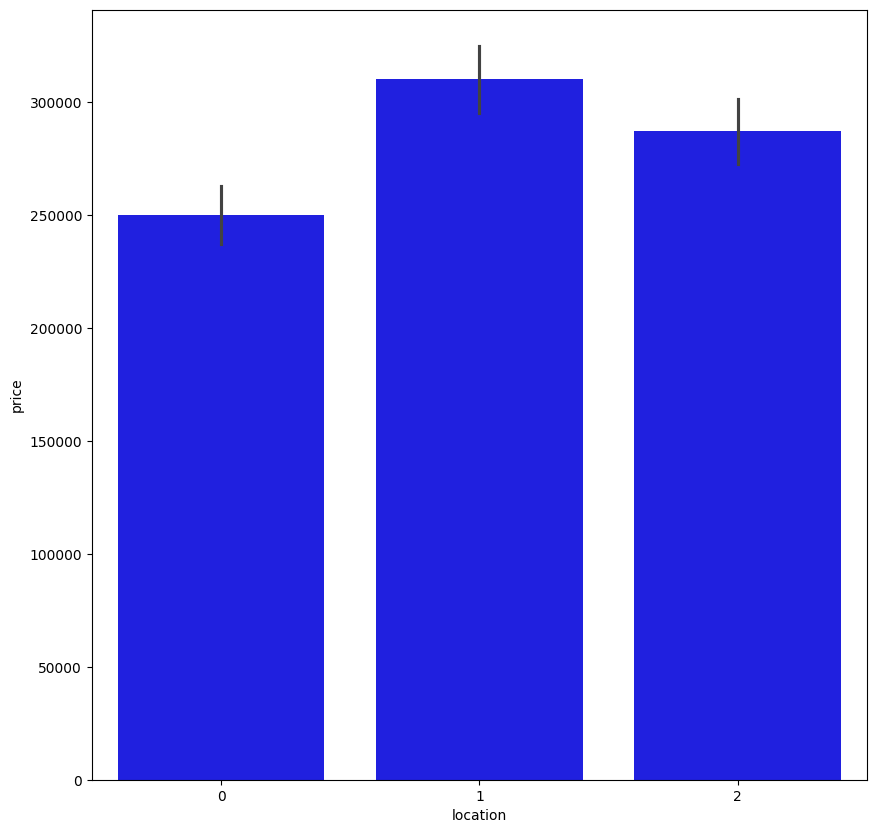

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x=data['Location'],y=data['Price'],color='blue')
plt.tilte=("impact location on price ")
plt.xlabel("location")
plt.ylabel("price")
plt.show()

In [ ]:
x=data.drop('Price',axis=1)
y=data['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
lr=LinearRegression()
de=DecisionTreeRegressor()
rf=RandomForestRegressor()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
de.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_lr=lr.predict(x_test)
y_pred_de=de.predict(x_test)
y_pred_rf=rf.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error



In [ ]:
print("MBE for lr",mean_absolute_error(y_test,y_pred_lr))
print("MSE for lr",mean_squared_error(y_test,y_pred_lr))
print("R2 for lr",r2_score(y_test,y_pred_lr))




MBE for lr 109912.47385351837
MSE for lr 15770483148.400627
R2 for lr 0.06591055803266965


In [ ]:
print("MBE for de",mean_absolute_error(y_test,y_pred_de))
print("MSE for de",mean_squared_error(y_test,y_pred_de))
print("R2 for de",r2_score(y_test,y_pred_de))




MBE for de 0.0
MSE for de 0.0
R2 for de 1.0


In [ ]:
print("MBE for rf",mean_absolute_error(y_test,y_pred_rf))
print("MSE for rf",mean_squared_error(y_test,y_pred_rf))
print("R2 for rf",r2_score(y_test,y_pred_rf))




MBE for rf 566.3066999999993
MSE for rf 2508414.0707919956
R2 for rf 0.9998514260420838


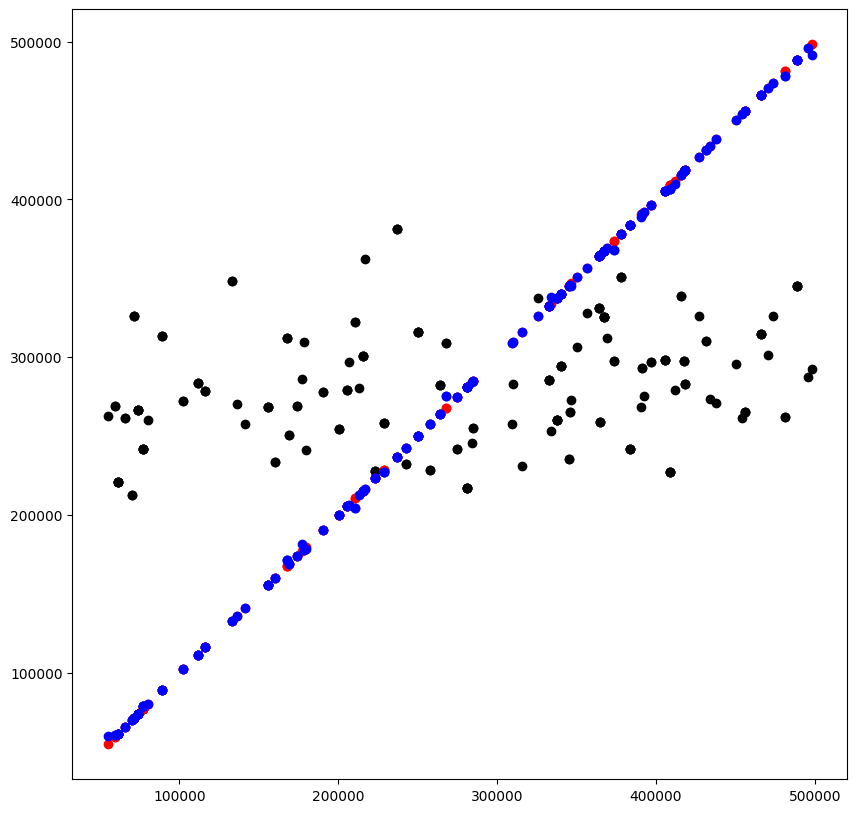

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x=y_test,y=y_pred_lr,color='black')
plt.scatter(x=y_test,y=y_pred_de,color='red')
plt.scatter(x=y_test,y=y_pred_rf,color='blue')


plt.tilte=("Actule and predicted ")

plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


In [ ]:
grid_params={
    'max_depth':[10,20,30,40,50],
    'max_leaf_nodes':[20,30,40,50,15,20]



}
grid_search_model = GridSearchCV(estimator=de, param_grid=grid_params, cv=5)
grid_search_model.fit(x_train,y_train)
grid_search_model.best_params_


{'max_depth': 20, 'max_leaf_nodes': 50}

In [ ]:
y_pred_grid=grid_search_model.best_estimator_.predict(x_test)

In [ ]:
print("MSB",mean_absolute_error(y_test,y_pred_grid))
print("MSE",mean_squared_error(y_test,y_pred_grid))
print("r2",r2_score(y_test,y_pred_grid))

MSB 17223.220838076657
MSE 596106164.7012935
r2 0.9646924910607075


In [ ]:
random_params={
    'max_depth':[10,20,30,40,50],
    'n_estimators':[200,300,400,500,150,20]



}
rando_model =RandomizedSearchCV(estimator=rf, param_distributions=random_params, cv=5)
rando_model.fit(x_train,y_train)
rando_model.best_params_


{'n_estimators': 300, 'max_depth': 40}

In [ ]:
y_pred_random=rando_model.best_estimator_.predict(x_test)


In [ ]:
print("MSB",mean_absolute_error(y_test,y_pred_random))
print("MSE",mean_squared_error(y_test,y_pred_random))
print("r2",r2_score(y_test,y_pred_random))

MSB 418.49638333333394
MSE 2008814.0295996142
r2 0.9998810174705323


In [ ]:
data.columns

Index(['Location', 'Size (sqft)', 'Bedrooms', 'Bathrooms', 'Year Built',
       'Condition', 'Price'],
      dtype='object')

In [ ]:
pip install gradio

In [ ]:
import gradio as gr

In [ ]:
import pandas as pd
import gradio as gr

def house_price(location, size, bedroom, bathroom, yearbuilt, condition):
    input_data = pd.DataFrame({
        'Location': [location],
        'Size (sqft)': [size],
        'Bedrooms': [bedroom],
        'Bathrooms': [bathroom],
        'Year Built': [yearbuilt],
        'Condition': [condition]
    })

    input_data['Location'] = le.transform(input_data['Location'])

    col_scaling = ['Size (sqft)', 'Bedrooms', 'Bathrooms', 'Year Built', 'Condition']
    input_data[col_scaling] = sc.transform(input_data[col_scaling])

    prediction = rf.predict(input_data)
    return f"Predicted house price: ${prediction[0]:,.2f}"

gr.Interface(
    fn=house_price,
    inputs=[
        gr.Dropdown(['Suburban', 'Urban', 'Rural'], label="Location"),
        gr.Number(label="Size (sqft)"),
        gr.Number(label='Bedrooms'),
        gr.Number(label='Bathrooms'),
        gr.Number(label='Year Built'),
        gr.Number(label='Condition'),
    ],
    outputs=gr.Textbox(label='prediction'),
    title="Predict House Price"
).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://72902b2a832cddb1fd.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
data.columns

Index(['Location', 'Size (sqft)', 'Bedrooms', 'Bathrooms', 'Year Built',
       'Condition', 'Price'],
      dtype='object')

In [ ]:
def house_price(location,size,bedroom,bathroom,yearbulit,condition):
  input_data=pd.DataFrame({
      'Location':[location],
      'Size (sqft)':[size],
      'Bedrooms':[bedroom],
      "Bathrooms":[bathroom],
      'Year Built':[yearbulit],
      'Condition':[condition]





  })
  input_data['Location']=le.transform(input_data['Location'])
  cols_scaling = ['Size (sqft)', 'Bedrooms', 'Bathrooms', 'Year Built', 'Condition']
  input_data[cols_scaling]=sc.transform(input_data[cols_scaling])
  predication=rf.predict(input_data)
  return f"prdiction house price: ${predication[0]:,.2f}"
gr.Interface(
    fn=house_price,
    inputs=[
        gr.Dropdown(['Suburban', 'Urban', 'Rural'],label="Location"),
        gr.Number(label='Size (sqft)'),
        gr.Number(label='Bedrooms'),
        gr.Number(label='Bathrooms'),
        gr.Number(label='Year Built'),
        gr.Number(label='Condition'),


    ],
    outputs=gr.Textbox(label='predication'),
    title="predication house price"

).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://06f5a3b44bab6b0fc4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
